# Import package

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [357]:
load_data = pd.read_csv('nyc-rolling-sales.csv')

nyc = load_data

Berikut adalah penjelasan mengenai variabel-variabel dalam dataset ini:

1. Borough : Nama borough tempat properti berada.

2. Neighborhood : Nama area yang ditetapkan penilai departemen keuangan.

3. Building Class Category : Kategori umum bangunan atau properti.

4. Tax Class at Present : Kelas Pajak.

5. Block : Sub-divisi dari borough tempat properti.

6. Lot : Sub-divisi dari Block dan mewakili lokasi unik properti.

7. Easement : Hak guna bangunan.

8. Buliding Class at Present : Kelas atau kategori umum dari tipe bangunan properti tersebut.

9. Address : Alamat yang tercantum pada berkas penjualan. Penjualan koperasi menyantumkan nomor apartment

10. Zip Code : Kode pos.

11. Residential Unit : Jumlah unit hunian.

12. Commercial Unit : Jumlah unit komersial.

13. Total Unit :  Jumlah Properti.

14. Land Square Feet : Luas tanah.

15. Gross Square Feet : Luas total semua lantai bangunan.

16. Year Built : Tahun dibangun.

17. Building Class at Time of Sale : Kelas  atau klasifikasi bangunan pada saat penjualan properti terjadi.

18. Sale Price : Harga jual.

19. Sale Date :  Tanggal penjualan.

# Data cleanning

In [358]:
nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [359]:
# drop kolom yang tidak diperlukan
nyc.drop(["Unnamed: 0"], axis=1, inplace=True)

In [360]:
# mengubah kode angka menjadi nama borough pada kolom 'BOROUGH"

borough_name = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}

nyc['BOROUGH'] = nyc['BOROUGH'].replace(borough_name)

In [361]:
variabel_angka = ['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']

for kolom in variabel_angka:
    nyc[kolom] = pd.to_numeric(nyc[kolom],  errors='coerce')

In [362]:
kategori = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','ZIP CODE','YEAR BUILT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE']

for kolom in kategori: 
    nyc[kolom] = nyc[kolom].astype("category")

In [363]:
nyc['SALE DATE']= pd.to_datetime(nyc['SALE DATE'], errors='coerce')

In [364]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [365]:
nyc.replace(' ',np.nan, inplace=True)

In [366]:
nyc.replace('-',np.nan, inplace=True)

In [367]:
nyc.isna().sum().sum()

219945

In [368]:
nyc.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [369]:
nyc.isna().sum() /len(nyc) *100

BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
dtype: float64

<Axes: >

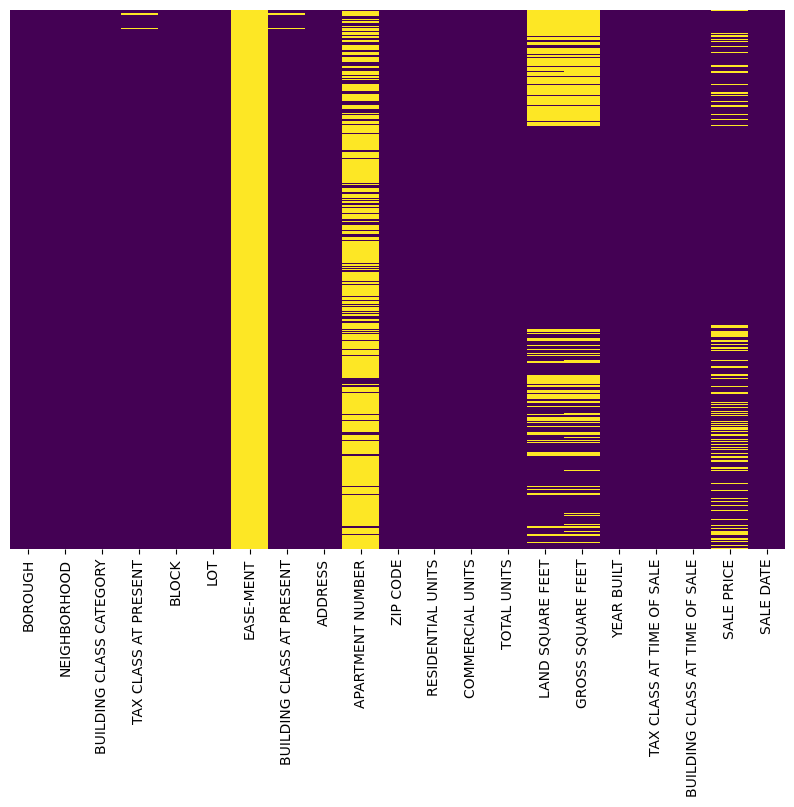

In [370]:
plt.figure(figsize=(10,7))
sns.heatmap(nyc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [371]:
# drop kolom yang tidak relevan
nyc.drop(['BLOCK','LOT','EASE-MENT','ADDRESS','ZIP CODE','APARTMENT NUMBER'], axis=1, inplace=True)

In [372]:
# nyc.dropna(inplace=True)

In [373]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BUILDING CLASS AT PRESENT       83810 non-null  category      
 5   RESIDENTIAL UNITS               84548 non-null  int64         
 6   COMMERCIAL UNITS                84548 non-null  int64         
 7   TOTAL UNITS                     84548 non-null  int64         
 8   LAND SQUARE FEET                58296 non-null  float64       
 9   GROSS SQUARE FEET               56936 non-null  float64       
 10  YEAR BUILT                      84548 non-null  category      
 11  TA

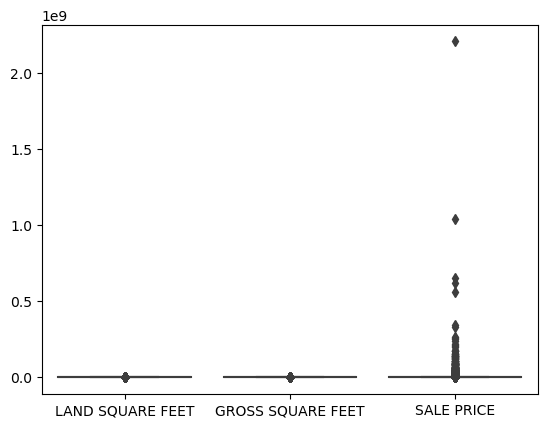

In [374]:
kolom_missing = nyc[['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']]
kolom_missing

sns.boxplot(data=kolom_missing)
plt.show()

# karena data memiliki outlier maka, nilai null diganti dengan median

In [375]:
for kolom in kolom_missing:
    median = nyc[kolom].median()
    nyc[kolom].fillna(median, inplace=True)

In [376]:
nyc.dropna(inplace=True)

<Axes: >

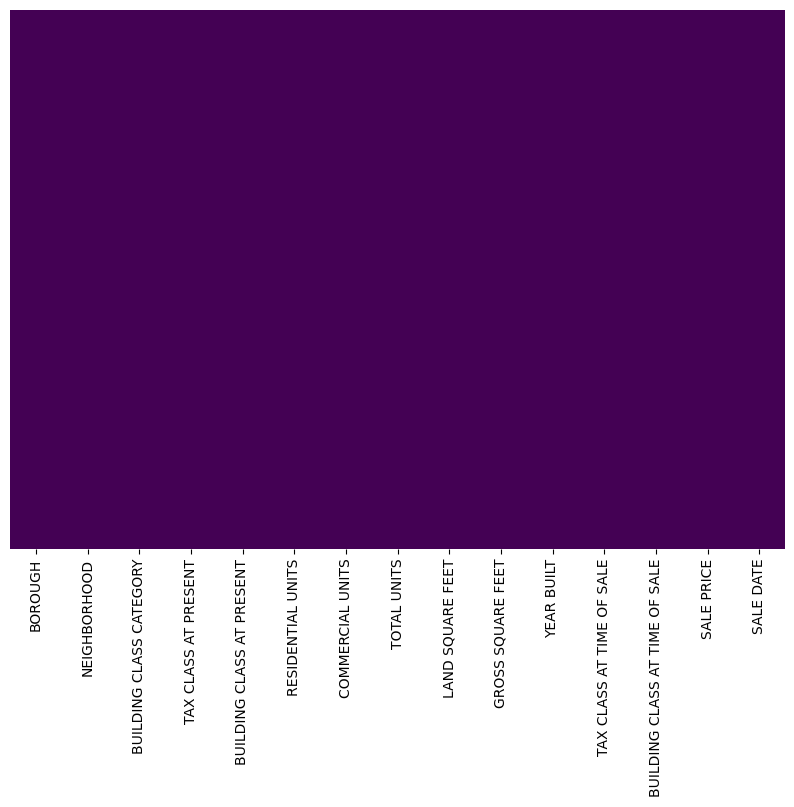

In [377]:
plt.figure(figsize=(10,7))
sns.heatmap(nyc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [378]:
nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C7,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,K6,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


# Mean

# Median

# Modus

# Range

# Variance

# Standar Deviasi

# Probability Distribution

# Confidence Interval